In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

crimes = pd.read_csv('../NYPD_Complaint_Data_Historic.csv',error_bad_lines=False)
print('Dataset Shape: ', crimes.shape)
crimes.head(3)

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Shape:  (6500870, 35)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,238346510,04/05/2013,22:57:00,04/05/2013,23:06:00,77.0,04/06/2013,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.672009,-73.959886,"(40.67200915, -73.959885679)",PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,F
1,514112653,04/05/2013,22:55:00,04/06/2013,00:02:00,1.0,04/06/2013,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,NaN,40.726316,-74.001975,"(40.726315852, -74.001974956)",PATROL BORO MAN SOUTH,NaN,65+,WHITE,F
2,865099785,04/05/2013,22:47:00,04/05/2013,23:09:00,44.0,04/06/2013,106,FELONY ASSAULT,105.0,...,NaN,NaN,40.831270,-73.914266,"(40.831270161, -73.914265926)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,F


In [2]:
crimes.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1607101
CMPLNT_TO_TM         1602801
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18805
PD_CD                   5496
PD_DESC                 5496
CRM_ATPT_CPTD_CD           7
LAW_CAT_CD                 0
BORO_NM                10518
LOC_OF_OCCUR_DESC    1394809
PREM_TYP_DESC          37703
JURIS_DESC                 0
JURISDICTION_CODE       5496
PARKS_NM             6479911
HADEVELOPT           6177206
HOUSING_PSA          5998248
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4590963
SUSP_RACE            3222422
SUSP_SEX             3355736
TRANSIT_DISTRICT     6356760
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             5953
STATION_NAME         6356760
VIC_AGE_GROUP        1638441
VIC_RACE                 305
VIC_SEX       

In [3]:
crimes.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.500870e+06,6.498704e+06,6.500870e+06,6.495374e+06,6.495374e+06,6.483531e+06,6.483531e+06,144110.000000,6.483531e+06,6.483531e+06
mean,5.500375e+08,6.334385e+01,2.951970e+02,4.158180e+02,7.149465e-01,1.004771e+06,2.069993e+05,13.634946,4.073480e+01,-7.392592e+01
std,2.597725e+08,3.446073e+01,1.494116e+02,2.181813e+02,6.629446e+00,2.178907e+04,3.164418e+04,12.485026,8.675600e-02,7.857901e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.010000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.251865e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.916830e+05,1.842840e+05,3.000000,4.067243e+01,-7.397323e+01
50%,5.499805e+08,6.300000e+01,3.410000e+02,3.880000e+02,0.000000e+00,1.004369e+06,2.058520e+05,11.000000,4.073167e+01,-7.392733e+01
75%,7.749793e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016581e+06,2.351590e+05,30.000000,4.081212e+01,-7.388328e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


### Data cleaning

In [4]:
#droping useless/sparse columns
crimes.drop(['CMPLNT_TO_DT', 'KY_CD', 'SUSP_AGE_GROUP','VIC_AGE_GROUP', 'CRM_ATPT_CPTD_CD', 'CMPLNT_TO_TM', 'RPT_DT', 'PD_CD', 'ADDR_PCT_CD', 'JURISDICTION_CODE', 'LOC_OF_OCCUR_DESC', 'HADEVELOPT', 'TRANSIT_DISTRICT','PARKS_NM', 'HOUSING_PSA', 'Lat_Lon', 'STATION_NAME'], inplace=True, axis=1)
crimes.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_RACE,VIC_SEX
0,238346510,04/05/2013,22:57:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995378.0,184107.0,NaN,NaN,40.672009,-73.959886,PATROL BORO BKLYN NORTH,BLACK,F
1,514112653,04/05/2013,22:55:00,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,983703.0,203890.0,NaN,NaN,40.726316,-74.001975,PATROL BORO MAN SOUTH,WHITE,F
2,865099785,04/05/2013,22:47:00,FELONY ASSAULT,STRANGULATION 1ST,FELONY,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,1007976.0,242140.0,NaN,NaN,40.831270,-73.914266,PATROL BORO BRONX,UNKNOWN,F


In [5]:
#removing null values
crimes = crimes[pd.notnull(crimes['Latitude'])]
crimes = crimes[pd.notnull(crimes['CMPLNT_FR_DT'])]
crimes = crimes[pd.notnull(crimes['CMPLNT_FR_TM'])]
crimes = crimes[pd.notnull(crimes['OFNS_DESC'])]
crimes = crimes[pd.notnull(crimes['BORO_NM'])]
crimes = crimes[pd.notnull(crimes['PREM_TYP_DESC'])]
crimes = crimes[pd.notnull(crimes['PATROL_BORO'])]

In [6]:
#defining bounding box for New York City
crimes = crimes[(crimes['Latitude'] < 40.9) & (crimes['Latitude'] > 40.5)]
crimes = crimes[(crimes['Longitude'] < -73.7) & (crimes['Longitude'] > -74.3)]

In [7]:
#Creating a DateTime column
crimes['TimeStamp'] = crimes.pop('CMPLNT_FR_DT') + ' ' + crimes.pop('CMPLNT_FR_TM')

In [8]:
crimes.TimeStamp = pd.to_datetime(crimes.TimeStamp, format='%m/%d/%Y %H:%M:%S', errors='coerce')

In [9]:
#Complaints before 2006 were badly recorded
crimes = crimes[(crimes['TimeStamp'].dt.year > 2006)]

In [10]:
crimes['OFNS_DESC'].value_counts().sort_values(ascending=True)

KIDNAPPING AND RELATED OFFENSES              2
OFFENSES AGAINST MARRIAGE UNCL               3
UNDER THE INFLUENCE OF DRUGS                 3
ABORTION                                     7
FORTUNE TELLING                              9
OTHER STATE LAWS (NON PENAL LAW)            10
OTHER TRAFFIC INFRACTION                    14
LOITERING/DEVIATE SEX                       14
ADMINISTRATIVE CODES                        17
LOITERING FOR DRUG PURPOSES                 19
LOITERING                                   22
KIDNAPPING                                  29
NYS LAWS-UNCLASSIFIED VIOLATION             44
DISRUPTION OF A RELIGIOUS SERV              46
INTOXICATED/IMPAIRED DRIVING                56
UNLAWFUL POSS. WEAP. ON SCHOOL              57
NEW YORK CITY HEALTH CODE                   79
ANTICIPATORY OFFENSES                       90
HOMICIDE-NEGLIGENT-VEHICLE                  94
HOMICIDE-NEGLIGENT,UNCLASSIFIE             124
ESCAPE 3                                   171
LOITERING/GAM

In [11]:
#Removing rare/undefined crimes
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS (NON PENAL LAW)']
crimes = crimes[crimes['OFNS_DESC'] != 'OFFENSES AGAINST MARRIAGE UNCL']
crimes = crimes[crimes['OFNS_DESC'] != 'LOITERING/DEVIATE SEX']
crimes = crimes[crimes['OFNS_DESC'] != 'FORTUNE TELLING']
crimes = crimes[crimes['OFNS_DESC'] != 'ABORTION']
crimes = crimes[crimes['OFNS_DESC'] != 'NYS LAWS-UNCLASSIFIED VIOLATION']
crimes = crimes[crimes['OFNS_DESC'] != 'NEW YORK CITY HEALTH CODE']
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS (NON PENAL LA']
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS']
#crimes = crimes[crimes['SUSP_RACE'] != 'UNKNOWN']
#crimes = crimes[crimes['SUSP_SEX'] != 'U']

In [12]:
crimes['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT-VEHICLE','HOMICIDE-NEGLIGENT',inplace=True)
crimes['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE','HOMICIDE-NEGLIGENT',inplace=True)

crimes['OFNS_DESC'].replace('LOITERING/GAMBLING (CARDS, DIC','LOITERING',inplace=True)
crimes['OFNS_DESC'].replace('LOITERING','LOITERING',inplace=True)

crimes['OFNS_DESC'].replace('OTHER OFFENSES RELATED TO THEF','THEFT-FRAUD',inplace=True)
crimes['OFNS_DESC'].replace('OFFENSES INVOLVING FRAUD','THEFT-FRAUD',inplace=True)
crimes['OFNS_DESC'].replace('FRAUDS','THEFT-FRAUD',inplace=True)

crimes['OFNS_DESC'].replace('INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',inplace=True)

crimes['OFNS_DESC'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'LARCENY OF MOTOR VEHICLE',inplace=True)
crimes['OFNS_DESC'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'LARCENY OF MOTOR VEHICLE',inplace=True)
crimes['OFNS_DESC'].replace("BURGLAR'S TOOLS", 'BURGLARY',inplace=True)
crimes['OFNS_DESC'].replace("FRAUDULENT ACCOSTING", 'MISCELLANEOUS PENAL LAW',inplace=True)
crimes['OFNS_DESC'].replace("OTHER TRAFFIC INFRACTION", 'VEHICLE AND TRAFFIC LAWS',inplace=True)
crimes['OFNS_DESC'].replace("THEFT OF SERVICES", 'PETIT LARCENY',inplace=True)
crimes['OFNS_DESC'].replace("ENDAN WELFARE INCOMP", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("OFFENSES AGAINST PUBLIC SAFETY", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("DISORDERLY CONDUCT", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("JOSTLING", 'OFFENSES AGAINST THE PERSON', inplace=True)
crimes['OFNS_DESC'].replace("OFFENSES AGAINST THE PERSON", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("DISORDERLY CONDUCT", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("ADMINISTRATIVE CODES", 'ADMINISTRATIVE CODE',inplace=True)

crimes['PREM_TYP_DESC'].replace('RESIDENCE - APT. HOUSE','RESIDENCE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE - PUBLIC HOUSING','RESIDENCE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE-HOUSE','RESIDENCE',inplace=True)

crimes['PREM_TYP_DESC'].replace('CANDY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CHAIN STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('DEPARTMENT STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('DRUG STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE-HOUSE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('LIQUOR STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('STORE UNCLASSIFIED','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('TELECOMM. STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('VARIETY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('VIDEO STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('SMALL MERCHANT','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('SHOE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('FOOD SUPERMARKET','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('GROCERY/BODEGA','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('JEWELRY','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('BOOK/CARD','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CANDY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CLOTHING/BOUTIQUE','STORE',inplace=True)

crimes['PREM_TYP_DESC'].replace('BAR/NIGHT CLUB','RESTAURANT/BAR',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESTAURANT/DINER','RESTAURANT/BAR',inplace=True)
crimes['PREM_TYP_DESC'].replace('FAST FOOD','RESTAURANT/BAR',inplace=True)

crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PRIVATE)','PARKING_LOT',inplace=True)
crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PUBLIC)','PARKING_LOT',inplace=True)

crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PRIVATE)','SCHOOL',inplace=True)
crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PUBLIC)','SCHOOL',inplace=True)

crimes['PREM_TYP_DESC'].replace('TAXI (LIVERY LICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TAXI (YELLOW LICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TAXI/LIVERY (UNLICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRAMWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRANSIT - NYC SUBWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRANSIT FACILITY (OTHER)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('HIGHWAY/PARKWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('BUS (NYC TRANSIT)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('BUS (OTHER)','TRANSIT',inplace=True)

crimes['PREM_TYP_DESC'].replace('MOSQUE','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('CHURCH','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('SYNAGOGUE','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('OTHER HOUSE OF WORSHIP','RELIGIOUS',inplace=True)

crimes['PREM_TYP_DESC'].replace('ABANDONED BUILDING','OTHER',inplace=True)


In [13]:
crimes.shape

(5882463, 17)

In [14]:
crimes = crimes.sample(frac=0.153, axis=0)
crimes.shape

(900017, 17)

### Feature engeneering

In [15]:
crimes['Date'] = crimes.TimeStamp.dt.date
crimes['Date'].sample(3)

4677300    2010-11-10
2472244    2018-01-27
5820713    2012-08-04
Name: Date, dtype: object

In [16]:
crimes['Year'] = crimes.TimeStamp.dt.year
crimes['Year'].sample(3)

1993922    2017
5146833    2011
1220409    2016
Name: Year, dtype: int64

In [17]:
crimes['Month'] = crimes.TimeStamp.dt.month
crimes['Month'].sample(3)

5018583     3
3332276     6
724928     10
Name: Month, dtype: int64

In [18]:
crimes['Day'] = crimes['TimeStamp'].dt.day
crimes['Day'].sample(3)

4545115    20
383820     22
3604124    27
Name: Day, dtype: int64

In [19]:
crimes['Weekday'] = crimes['TimeStamp'].dt.weekday_name
crimes['Weekday'].sample(3)

2431382    Wednesday
541881     Wednesday
2393996     Saturday
Name: Weekday, dtype: object

In [20]:
days_to_int_dict = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6,
}
crimes['Weekday'] = crimes['Weekday'].map(days_to_int_dict)

In [21]:
crimes['Hour'] = crimes.TimeStamp.dt.hour
crimes['Hour'].sample(3)

1346493    12
6308594     3
1056145    20
Name: Hour, dtype: int64

In [22]:
crimes['Minute'] = crimes.TimeStamp.dt.minute
crimes['Minute'].sample(3)

1799489    30
5586900    55
4155194    23
Name: Minute, dtype: int64

In [23]:
crimes['n_days'] = (crimes['Date'] - crimes['Date'].min()).apply(lambda x: x.days)
crimes['n_days'].sample(3)

4399301     885
3340348     160
4720371    1379
Name: n_days, dtype: int64

In [24]:
crimes.to_csv('data_analyse.csv',index=False)
print('Done Outputing data_analyse.csv')

Done Outputing data_analyse.csv


In [25]:
crimes.drop(['CMPLNT_NUM', 'X_COORD_CD', 'Y_COORD_CD', 'LAW_CAT_CD', 'PD_DESC', 'TimeStamp', 'PREM_TYP_DESC', 'Date','SUSP_RACE', 'SUSP_SEX', 'VIC_RACE', 'VIC_SEX', 'JURIS_DESC'], inplace=True, axis=1)

In [26]:
crimes.sample(3)

,OFNS_DESC,BORO_NM,Latitude,Longitude,PATROL_BORO,Year,Month,Day,Weekday,Hour,Minute,n_days
2386232,HARRASSMENT 2,QUEENS,40.768088,-73.777891,PATROL BORO QUEENS NORTH,2018,4,7,5,9,0,4114
5404406,GRAND LARCENY,BRONX,40.828669,-73.878236,PATROL BORO BRONX,2011,6,10,4,21,45,1621
5348644,GRAND LARCENY,STATEN ISLAND,40.542567,-74.216739,PATROL BORO STATEN ISLAND,2011,7,19,1,1,0,1660


In [28]:
crimes['OFNS_DESC'].value_counts()

PETIT LARCENY                           151422
HARRASSMENT 2                           111628
ASSAULT 3 & RELATED OFFENSES             95518
CRIMINAL MISCHIEF & RELATED OF           90830
GRAND LARCENY                            77185
DANGEROUS DRUGS                          56459
OFF. AGNST PUB ORD SENSBLTY &            49926
FELONY ASSAULT                           34411
ROBBERY                                  32920
BURGLARY                                 31759
MISCELLANEOUS PENAL LAW                  22949
DANGEROUS WEAPONS                        21206
THEFT-FRAUD                              19964
OFFENSES AGAINST PUBLIC ADMINI           18113
LARCENY OF MOTOR VEHICLE                 15884
INTOXICATED/IMPAIRED DRIVING             12632
VEHICLE AND TRAFFIC LAWS                 10976
CRIMINAL TRESPASS                        10648
SEX CRIMES                               10120
FORGERY                                   9157
POSSESSION OF STOLEN PROPERTY             4771
UNAUTHORIZED 

In [30]:
#removing because there will be unrecognized values in model
crimes = crimes[crimes['OFNS_DESC'] != 'LOITERING FOR DRUG PURPOSES']
crimes = crimes[crimes['OFNS_DESC'] != 'UNDER THE INFLUENCE OF DRUGS']

In [31]:
crimes.to_csv('data_clean.csv',index=False)
print('Done Outputing data_clean.csv')

Done Outputing data_clean.csv


In [32]:
categories = crimes['OFNS_DESC'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = crimes['OFNS_DESC'].map(category_dict)

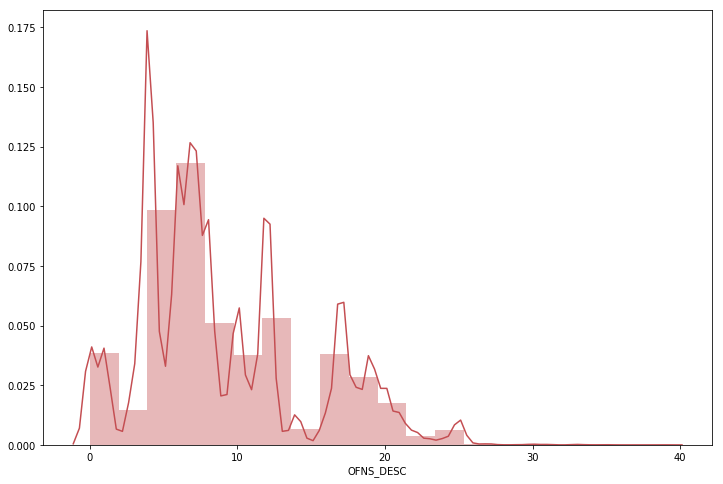

In [33]:
plt.figure(figsize=(12,8))
sns.set_color_codes()
sns.distplot(y,bins=20,kde=True,color='r')

In [36]:
from sklearn import preprocessing

category = preprocessing.LabelEncoder()
category_crime = category.fit_transform(crimes.OFNS_DESC)
print(category_crime)

[14 34 33 ...  8 36  5]


In [37]:
category.inverse_transform(category_crime)

array(['FELONY ASSAULT', 'ROBBERY', 'RAPE', ...,
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'ASSAULT 3 & RELATED OFFENSES'], dtype=object)

In [39]:
#feature normalization
def normalize(data): 
    data = (data - data.min()) / (data.max() - data.min())
    return data

crimes['n_days'] = normalize(crimes.n_days)

In [46]:
def prepare_data(df):
    """
    Preprocessing Training/Testing Data 
    """
    feature_list=df.columns.tolist()  
    cleanData=df[feature_list]
    cleanData.index=range(len(df))
    
    print("Creating sin-cos Lat/Lon feature...")
    cleanData['LL_X'] = np.cos(cleanData['Latitude']) * np.cos(cleanData['Longitude'])
    cleanData['LL_Y'] = np.cos(cleanData['Latitude']) * np.sin(cleanData['Longitude'])
    cleanData['LL_Z'] = np.sin(cleanData['Latitude'])
    '''ll_scaler = preprocessing.StandardScaler()
    ll_scaler.fit(cleanData[["XLL","YLL", "ZLL"]])
    cleanData[["XLL","YLL", "ZLL"]] = ll_scaler.transform(cleanData[["XLL","YLL", "ZLL"]])'''
    
    print("Creating ordinal representations of circular features (Month/Year/Weekday/Minute)")
    cleanData['Hour_X'] = np.sin(2*np.pi*cleanData['Hour']/23)
    cleanData['Hour_Y'] = np.cos(2*np.pi*cleanData['Hour']/23)
    cleanData['Month_X'] = np.sin(2*np.pi*cleanData['Month']/11)
    cleanData['Month_Y'] = np.cos(2*np.pi*cleanData['Month']/11)
    cleanData['Weekday_X'] = np.sin(2*np.pi*cleanData['Weekday']/6)
    cleanData['Weekday_Y'] = np.cos(2*np.pi*cleanData['Weekday']/6)
    cleanData['Minute_X'] = np.sin(2*np.pi*cleanData['Weekday']/59)
    cleanData['Minute_Y'] = np.cos(2*np.pi*cleanData['Weekday']/59) 
    cleanData['Year'] = normalize(cleanData.Year)

    category = preprocessing.LabelEncoder()
    category_boro = category.fit_transform(cleanData.BORO_NM)
    
    cleanData['BORO_NM'] = category_boro
    
    print ("Droping processed columns...")
    cleanData=cleanData.drop(["Minute", "Latitude", "Longitude","PATROL_BORO", "OFNS_DESC", "Hour","Day","Month","Weekday"],\
                                axis=1,inplace=False)
    
    print('Done!')
    
    return cleanData

In [47]:
features = prepare_data(crimes)
features['crime'] = category_crime

Creating sin-cos Lat/Lon feature...
Creating ordinal representations of circular features (Month/Year/Weekday/Minute)
Droping processed columns...
Done!


In [48]:
collist=features.columns.tolist()
collist

['BORO_NM',
 'Year',
 'n_days',
 'LL_X',
 'LL_Y',
 'LL_Z',
 'Hour_X',
 'Hour_Y',
 'Month_X',
 'Month_Y',
 'Weekday_X',
 'Weekday_Y',
 'Minute_X',
 'Minute_Y',
 'crime']

In [49]:
features.head()

,BORO_NM,Year,n_days,LL_X,LL_Y,LL_Z,Hour_X,Hour_Y,Month_X,Month_Y,Weekday_X,Weekday_Y,Minute_X,Minute_Y,crime
0,1,0.636364,0.617298,-0.127743,-0.957180,0.259786,0.730836,0.682553,2.817326e-01,-0.959493,1.224647e-16,-1.0,0.314077,0.949398,14
1,1,0.090909,0.085121,-0.105852,-0.981359,0.160408,0.942261,-0.334880,5.406408e-01,0.841254,8.660254e-01,-0.5,0.211383,0.977403,34
2,3,0.000000,0.002967,-0.042429,-0.994543,0.095307,-0.136167,-0.990686,5.406408e-01,0.841254,-2.449294e-16,1.0,0.596367,0.802712,33
3,2,0.636364,0.653583,-0.108235,-0.994115,-0.004443,-0.269797,0.962917,-1.133108e-15,1.000000,8.660254e-01,0.5,0.106293,0.994335,25
4,2,0.000000,0.057964,-0.159790,-0.979374,0.123670,-0.887885,0.460065,-9.096320e-01,0.415415,8.660254e-01,-0.5,0.211383,0.977403,30


In [51]:
features.to_csv('data_features.csv',index=False)
print('Done Outputing data_clean.csv')

Done Outputing data_clean.csv
